In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.calibration import calibration_curve
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve,average_precision_score

In [2]:
plt.style.use('seaborn-white')

In [14]:
GAT_Test = pd.read_csv('GAT_Test.csv')
other_Test = pd.read_csv('out.csv')
other_Test_ada = pd.read_csv('outada.csv')

In [15]:
GAT_Test

,Target,GAT
0,1.0,0.853150
1,1.0,0.879134
2,1.0,0.625325
3,0.0,0.596069
4,0.0,0.128890
...,...,...
386,0.0,0.085025
387,1.0,0.835343
388,1.0,0.897616
389,0.0,0.537700


In [16]:
other_Test

,Target,TabNet,rf,xgb,GCN
0,1,0.793765,0.662791,0.653025,0.544269
1,1,0.471984,0.918811,0.749733,0.517575
2,1,0.468848,0.930461,0.749733,0.527155
3,0,0.254059,0.442893,0.354306,0.491469
4,0,0.488066,0.626541,0.553235,0.486381
...,...,...,...,...,...
395,1,0.382092,0.789114,0.570688,0.506209
396,1,0.254752,0.445113,0.450958,0.496377
397,1,0.388614,0.700101,0.559251,0.519344
398,0,0.679121,0.638585,0.653798,0.494651


In [17]:
other_Test_ada

,Target,ada
0,0,0.482114
1,1,0.506451
2,0,0.489489
3,0,0.573351
4,0,0.476246
...,...,...
386,0,0.466422
387,0,0.474048
388,0,0.552249
389,0,0.502058


In [18]:
# for i in range(10):
#     GAT_Test = pd.concat([GAT_Test,GAT_Test])
#     other_Test = pd.concat([other_Test,other_Test])
#     other_Test_ada = pd.concat([other_Test_ada,other_Test_ada])

In [19]:
GAT_Test

,Target,GAT
0,1.0,0.853150
1,1.0,0.879134
2,1.0,0.625325
3,0.0,0.596069
4,0.0,0.128890
...,...,...
386,0.0,0.085025
387,1.0,0.835343
388,1.0,0.897616
389,0.0,0.537700


In [20]:
# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']

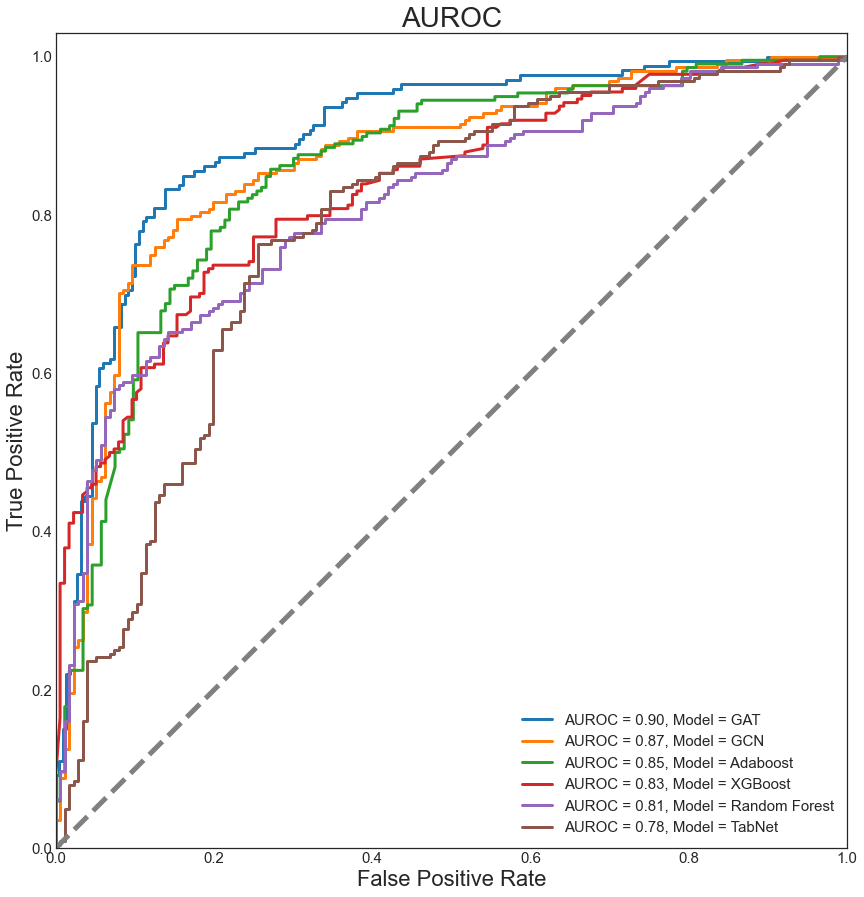

In [40]:
fig=plt.figure(figsize=(15, 15))
y_test = GAT_Test['Target']
y_GAT = GAT_Test['GAT']
fpr, tpr, thresholds = roc_curve(y_test, y_GAT, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"GAT"))


y_other = other_Test['Target']
y_GCN = other_Test['GCN']
y_tab = other_Test['TabNet']
y_rf = other_Test['rf']
y_xgb = other_Test['xgb']
y_othertest = other_Test_ada['Target']
y_ada = other_Test_ada['ada']

fpr, tpr, thresholds = roc_curve(y_other, y_GCN, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"GCN"))
fpr, tpr, thresholds = roc_curve(y_othertest, y_ada, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"Adaboost"))
fpr, tpr, thresholds = roc_curve(y_other, y_xgb, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"XGBoost"))
fpr, tpr, thresholds = roc_curve(y_other, y_rf, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"Random Forest"))
fpr, tpr, thresholds = roc_curve(y_other, y_tab, pos_label=1)
plt.plot(fpr, tpr, lw=3, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),"TabNet"))

plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
plt.axis('square')
plt.axis(xmin=0,xmax=1)
plt.axis(ymin=0,ymax=1.03)
plt.xticks(np.arange(0,1.05,0.2),fontsize = 15)
plt.yticks(np.arange(0,1.03,0.2),fontsize = 15)
plt.xlabel('False Positive Rate',fontsize=22)
plt.ylabel('True Positive Rate',fontsize=22)
plt.title('AUROC',fontsize=28)
plt.legend(loc='lower right',fontsize=15)

In [ ]:
def bin_total(y_true, y_prob, n_bins):
    bins = np.linespace(0.,1. + 1e-8, n_bins+1)
    binids = np.digitize(y_prob,bins)-1
    return np.bincount(binids,minlength = len(bins))

In [ ]:

hTEXT['group'] = 0
for g in range(len(hTEXT)):
    if g%4 == 0:
        hTEXT.loc[g,'group']=1
hTEXT_use = hTEXT[hTEXT['group']==1]
len(hTEXT_use)

iTEXT['group'] = 0
for g in range(len(iTEXT)):
    if g%4 == 0:
        iTEXT.loc[g,'group']=1
iTEXT_use = iTEXT[iTEXT['group']==1]
len(iTEXT_use)

# 1st Figure AUROC, 1:H单+E, 2:H合+E, 3:I单+E, 4:I合+E

In [ ]:
fig=plt.figure(figsize=(20, 20))


# 画第1个图
ax1=fig.add_subplot(221)
# forR_test_h_noTEXT

name_list = ['tabNET','xgb','rf','ada','extra']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree']

y_test = forR_test_h_noTEXT['label'].head(7463)
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_noTEXT[i].head(7463)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax1.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))

    j=j+1
y_test = hTEXT_use['text_label']


y_test_predprob = hTEXT_use['text_pred1']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
ax1.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),'DistilBERT' ))

name_list = ['vote','stacking']
out_name = ['Soft Voting','Stacking']
y_test = forR_test_h_noTEXT['label'].head(7463)
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_noTEXT[i].head(7463)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax1.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))

    j=j+1
ax1.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
ax1.axis('square')
ax1.axis(xmin=0,xmax=1)
ax1.axis(ymin=0,ymax=1)
ax1.set_xlabel('False Positive Rate',fontsize=20)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_title('Hemorrhagic Stroke Group$\mathregular{^a}$',fontsize=25)
ax1.legend(loc='lower right',fontsize=12)

# 画第2个图
ax2=fig.add_subplot(222)
# forR_test_h_noTEXT

name_list = ['tabNET','xgb','rf','ada','extra']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree']

y_test = forR_test_i_noTEXT['label'].head(7463)
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i].head(7463)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax2.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))

    j=j+1
y_test = iTEXT_use['text_label']


y_test_predprob = iTEXT_use['text_pred1']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
ax2.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),'DistilBERT' ))

name_list = ['vote','stacking']
out_name = ['Soft Voting','Stacking']
y_test = forR_test_i_noTEXT['label'].head(7463)
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i].head(7463)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax2.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))

    j=j+1
ax2.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
ax2.axis('square')
ax2.axis(xmin=0,xmax=1)
ax2.axis(ymin=0,ymax=1)
ax2.set_xlabel('False Positive Rate',fontsize=20)
ax2.set_ylabel('True Positive Rate',fontsize=20)
ax2.set_title('Ischemic Stroke Group$\mathregular{^b}$',fontsize=25)
ax2.legend(loc='lower right',fontsize=12)


# 画第3个图
ax3=fig.add_subplot(223)
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(10, 10))

y_test = forR_test_h_new['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_new[i]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax3.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))
    ax3.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
    ax3.axis('square')
    ax3.axis(xmin=0,xmax=1)
    ax3.axis(ymin=0,ymax=1)
    ax3.set_xlabel('False Positive Rate',fontsize=20)
    ax3.set_ylabel('True Positive Rate',fontsize=20)
    ax3.set_title('Hemorrhagic Stroke Group$\mathregular{^c}$',fontsize=25)
    ax3.legend(loc='lower right',fontsize=12)
    j=j+1

# 画第4个图
# forR_test_i
ax4=fig.add_subplot(224)
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']

y_test = forR_test_i['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i[i]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
    ax4.plot(fpr, tpr, lw=5, label = "AUROC = {:.2f}, Model = {}".format(auc(fpr, tpr),out_name[j]))
    ax4.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
    ax4.axis('square')
    ax4.axis(xmin=0,xmax=1)
    ax4.axis(ymin=0,ymax=1)
    ax4.set_xlabel('False Positive Rate',fontsize=20)
    ax4.set_ylabel('True Positive Rate',fontsize=20)
    ax4.set_title('Ischemic Stroke Group$\mathregular{^d}$',fontsize=25)
    ax4.legend(loc='lower right',fontsize=12)
    j=j+1



# 2nd figure AUPRC  1:H单+E, 2:H合+E, 3:I单+E, 4:I合+E

In [ ]:
fig=plt.figure(figsize=(15, 15))



# 画第1个图
ax1=fig.add_subplot(221)
# forR_test_h_noTEXT

name_list = ['tabNET','xgb','rf','ada','extra']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree']

y_test = forR_test_h_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
    ax1.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))

    j=j+1

y_test = hTEXT_use['text_label']
y_test_predprob = hTEXT_use['text_pred1']
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
ax1.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),'DistilBERT' ))


name_list = ['vote','stacking']
out_name = ['Soft Voting','Stacking']
y_test = forR_test_h_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
    ax1.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))

    j=j+1
    
ax1.axis('square')
ax1.axis(xmin=0,xmax=1)
ax1.axis(ymin=0,ymax=1)
ax1.set_xlabel('Recall',fontsize=20)
ax1.set_ylabel('Precision',fontsize=20)
ax1.set_title('Hemorrhagic Stroke Group$\mathregular{^a}$',fontsize=25)
ax1.legend(loc='lower left',fontsize=12)

# 画第2个图
ax2=fig.add_subplot(222)
# forR_test_i_noTEXT
name_list = ['tabNET','xgb','rf','ada','extra']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree']

y_test = forR_test_i_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)     
    ax2.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    j=j+1

y_test = iTEXT_use['text_label']
y_test_predprob = iTEXT_use['text_pred1']
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
ax2.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),'DistilBERT' ))


name_list = ['vote','stacking']
out_name = ['Soft Voting','Stacking']
y_test = forR_test_i_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)     
    ax2.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    j=j+1


ax2.axis('square')
ax2.axis(xmin=0,xmax=1)
ax2.axis(ymin=0,ymax=1)
ax2.set_xlabel('Recall',fontsize=20)
ax2.set_ylabel('Precision',fontsize=20)
ax2.set_title('Ischemic Stroke Group$\mathregular{^b}$',fontsize=25)
ax2.legend(loc='upper right',fontsize=12)


# 画第3个图
ax3=fig.add_subplot(223)
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']

y_test = forR_test_h_new['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_new[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
    ax3.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    ax3.axis('square')
    ax3.axis(xmin=0,xmax=1)
    ax3.axis(ymin=0,ymax=1)
    ax3.set_xlabel('Recall',fontsize=20)
    ax3.set_ylabel('Precision',fontsize=20)
    ax3.set_title('Hemorrhagic Stroke Group$\mathregular{^c}$',fontsize=25)
    ax3.legend(loc='lower left',fontsize=12)
    j=j+1


# 画第4个图
# forR_test_i
ax4=fig.add_subplot(224)
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']

y_test = forR_test_i['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
    ax4.plot(recall,precision, lw=3, label = "AUPRC = {:.2f}, Model = {}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    ax4.axis('square')
    ax4.axis(xmin=0,xmax=1)
    ax4.axis(ymin=0,ymax=1)
    ax4.set_xlabel('Recall',fontsize=20)
    ax4.set_ylabel('Precision',fontsize=20)
    ax4.set_title('Ischemic Stroke Group$\mathregular{^d}$',fontsize=25)
    ax4.legend(loc='lower left',fontsize=12)
    j=j+1




# Calibration Curve

In [ ]:
fig=plt.figure(figsize=(15, 15))



# 画第1个图
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']
ax1=fig.add_subplot(121)
y_test = forR_test_h_new['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_new[i]
    yy,xx = calibration_curve(y_test,y_test_predprob,n_bins=10)
            
    ax1.plot(yy, xx, lw=2,marker = 'o', label = "Model = {}".format(out_name[j]))
    ax1.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
    ax1.axis('square')
    ax1.axis(xmin=0,xmax=1)
    ax1.axis(ymin=0,ymax=1)
    ax1.set_xlabel('Predicted Probability',fontsize=20)
    ax1.set_ylabel('True Probability in Each Bin',fontsize=20)
    ax1.set_title('Calibration Curve\nHemorrhagic Stroke Group',fontsize=25)
    ax1.legend(loc='lower right',fontsize=12)
    j=j+1
    



# 画第2个图
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','AdaBoost','ExtraTree','Soft Voting','Stacking']
ax2=fig.add_subplot(122)
y_test = forR_test_i_new['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_new[i]
    yy,xx = calibration_curve(y_test,y_test_predprob,n_bins=10)
            
    ax2.plot(yy, xx, lw=2,marker = 'o', label = "Model = {}".format(out_name[j]))
    ax2.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
    ax2.axis('square')
    ax2.axis(xmin=0,xmax=1)
    ax2.axis(ymin=0,ymax=1)
    ax2.set_xlabel('Predicted Probability',fontsize=20)
    ax2.set_ylabel('True Probability in Each Bin',fontsize=20)
    ax2.set_title('Calibration Curve\nIschemic Stroke Group',fontsize=25)
    ax2.legend(loc='lower right',fontsize=12)
    j=j+1

# ax3=fig.add_subplot(223)    

# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_new[i]
#     ax3.hist(y_test_predprob, range=(0, 1), bins=10, label=out_name[j],histtype="step", lw=2)
#     ax3.set_xlabel("Mean predicted value")
#     ax3.set_ylabel("Count")
#     ax3.legend(loc="upper center", ncol=2)
#     j=j+1
    
    
# ax4=fig.add_subplot(224)    

# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i_new[i]
#     ax4.hist(y_test_predprob, range=(0, 1), bins=10, label=out_name[j],histtype="step", lw=2)
#     ax4.set_xlabel("Mean predicted value")
#     ax4.set_ylabel("Count")
#     ax4.legend(loc="upper center", ncol=2)
#     j=j+1

In [ ]:
# # forR_test_h

# plt.figure(figsize=(20, 20))

# y_test = forR_test_h['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h[i]
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))
#     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('False Positive Rate',fontsize=20)
#     plt.ylabel('True Positive Rate',fontsize=20)
#     plt.title('ROC Curve',fontsize=25)
#     plt.legend(loc='lower right',fontsize=20)
#     j=j+1


In [ ]:
# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(20, 20))

# y_test = forR_test_h['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h[i]
#     yy,xx = calibration_curve(y_test,y_test_predprob,n_bins=10)
            
#     plt.plot(yy, xx, lw=2,marker = 'o', label = "Model ={}".format(out_name[j]))
#     plt.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('Predicted Probability',fontsize=20)
#     plt.ylabel('True Probability in Each Bin',fontsize=20)
#     plt.title('Calibration Curve',fontsize=25)
#     plt.legend(loc='lower right',fontsize=20)
#     j=j+1

In [ ]:
# for i in name_list:
#     print (forR_test_h['label'],forR_test_h[i],10)

In [ ]:
# # forR_test_h_new
# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(10, 10))

# y_test = forR_test_h_new['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_new[i]
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))
#     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('False Positive Rate',fontsize=20)
#     plt.ylabel('True Positive Rate',fontsize=20)
#     plt.title('Hemorrhagic Stroke Group',fontsize=25)
#     plt.legend(loc='lower right',fontsize=15)
#     j=j+1


In [ ]:
# # forR_test_h_new
# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(10, 10))

# y_test = forR_test_h_new['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_new[i]
#     precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
# #     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('Recall',fontsize=20)
#     plt.ylabel('Precision',fontsize=20)
#     plt.title('Hemorrhagic Stroke Group',fontsize=25)
#     plt.legend(loc='lower left',fontsize=15)
#     j=j+1


In [ ]:
plt.figure(figsize=(10, 10))

y_test = forR_test_h_new['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_h_new[i]
    yy,xx = calibration_curve(y_test,y_test_predprob,n_bins=10)
            
    plt.plot(yy, xx, lw=2,marker = 'o', label = "Model ={}".format(out_name[j]))
    plt.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Predicted Probability',fontsize=20)
    plt.ylabel('True Probability in Each Bin',fontsize=20)
    plt.title('Calibration Curve\nHemorrhagic Stroke Group',fontsize=25)
    plt.legend(loc='lower right',fontsize=15)
    j=j+1

In [ ]:
# # forR_test_i

# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(10, 10))

# y_test = forR_test_i['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i[i]
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))
#     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('False Positive Rate',fontsize=20)
#     plt.ylabel('True Positive Rate',fontsize=20)
#     plt.title('Ischemic Stroke Group',fontsize=25)
#     plt.legend(loc='lower right',fontsize=15)
#     j=j+1

In [ ]:
# # forR_test_i

# name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
# plt.figure(figsize=(10, 10))

# y_test = forR_test_i['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i[i]
#     precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
# #     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('Recall',fontsize=20)
#     plt.ylabel('Precision',fontsize=20)
#     plt.title('Ischemic Stroke Group',fontsize=25)
#     plt.legend(loc='lower left',fontsize=15)
#     j=j+1


In [ ]:
name_list = ['tabNET','xgb','rf','ada','extra','vote','stacking']
out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree','Soft Voting','Stacking']
plt.figure(figsize=(10, 10))

y_test = forR_test_i['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i[i]
    yy,xx = calibration_curve(y_test,y_test_predprob,n_bins=10)
            
    plt.plot(yy, xx, lw=2,marker = 'o', label = "Model ={}".format(out_name[j]))
    plt.plot([0, 1], [0, 1], '--', lw=2, color = 'grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Predicted Probability',fontsize=20)
    plt.ylabel('True Probability in Each Bin',fontsize=20)
    plt.title('Calibration Curve\nIschemic Stroke Group',fontsize=25)
    plt.legend(loc='lower right',fontsize=15)
    j=j+1

In [ ]:
# # forR_test_i_new

# plt.figure(figsize=(20, 20))

# y_test = forR_test_i_new['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i_new[i]
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))
#     plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
#     plt.axis('square')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.xlabel('False Positive Rate',fontsize=20)
#     plt.ylabel('True Positive Rate',fontsize=20)
#     plt.title('ROC Curve',fontsize=25)
#     plt.legend(loc='lower right',fontsize=20)
#     j=j+1

In [ ]:
# # forR_test_h_noTEXT

# name_list = ['tabNET','xgb','rf','ada','extra']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree']

# plt.figure(figsize=(10, 10))

# y_test = forR_test_h_noTEXT['label'].head(7463)
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_noTEXT[i].head(7463)
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))

#     j=j+1
# y_test = hTEXT_use['text_label']


# y_test_predprob = hTEXT_use['text_pred1']
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
# plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'DistilBERT' ))

# name_list = ['vote','stacking']
# out_name = ['Soft Voting','Stacking']
# y_test = forR_test_h_noTEXT['label'].head(7463)
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_noTEXT[i].head(7463)
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))

#     j=j+1
# plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
# plt.axis('square')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate',fontsize=20)
# plt.ylabel('True Positive Rate',fontsize=20)
# plt.title('Hemorrhagic Stroke Group',fontsize=25)
# plt.legend(loc='lower right',fontsize=15)

In [ ]:
# # forR_test_h_noTEXT

# name_list = ['tabNET','xgb','rf','ada','extra']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree']

# plt.figure(figsize=(10, 10))

# y_test = forR_test_h_noTEXT['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_noTEXT[i]
#     precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))

#     j=j+1

# y_test = hTEXT_use['text_label']
# y_test_predprob = hTEXT_use['text_pred1']
# precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
# plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),'DistilBERT' ))


# name_list = ['vote','stacking']
# out_name = ['Soft Voting','Stacking']
# y_test = forR_test_h_noTEXT['label']
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_h_noTEXT[i]
#     precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))

#     j=j+1
    
# plt.axis('square')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('Recall',fontsize=20)
# plt.ylabel('Precision',fontsize=20)
# plt.title('Hemorrhagic Stroke Group',fontsize=25)
# plt.legend(loc='lower left',fontsize=15)

In [ ]:
# # forR_test_i_noTEXT
# name_list = ['tabNET','xgb','rf','ada','extra']
# out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree']

# plt.figure(figsize=(10, 10))

# y_test = forR_test_i_noTEXT['label'].head(22770)
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i_noTEXT[i].head(22770)
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))
#     j=j+1
# y_test = iTEXT_use['text_label']


# y_test_predprob = iTEXT_use['text_pred1']
# fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
# plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'DistilBERT' ))

# name_list = ['vote','stacking']
# out_name = ['Soft Voting','Stacking']
# y_test = forR_test_i_noTEXT['label'].head(7463)
# j = 0
# for i in name_list:
#     y_test_predprob = forR_test_i_noTEXT[i].head(7463)
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
            
#     plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),out_name[j]))

#     j=j+1

# plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
# plt.axis('square')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.xlabel('False Positive Rate',fontsize=20)
# plt.ylabel('True Positive Rate',fontsize=20)
# plt.title('Ischemic Stroke Group',fontsize=25)
# plt.legend(loc='lower right',fontsize=15)

In [ ]:
# forR_test_i_noTEXT
name_list = ['tabNET','xgb','rf','ada','extra']
out_name = ['TabNet','XGBoost','Random Forest','Adaboost','ExtraTree']

plt.figure(figsize=(10, 10))

y_test = forR_test_i_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)     
    plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    j=j+1

y_test = iTEXT_use['text_label']
y_test_predprob = iTEXT_use['text_pred1']
precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)
            
plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),'DistilBERT' ))


name_list = ['vote','stacking']
out_name = ['Soft Voting','Stacking']
y_test = forR_test_i_noTEXT['label']
j = 0
for i in name_list:
    y_test_predprob = forR_test_i_noTEXT[i]
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_predprob, pos_label=1)     
    plt.plot(recall,precision, lw=3, label = "AUROC ={:.2f}, Model ={}".format(average_precision_score(y_test, y_test_predprob),out_name[j]))
    j=j+1


plt.axis('square')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.title('Ischemic Stroke Group',fontsize=25)
plt.legend(loc='upper right',fontsize=15)

In [ ]:
plt.figure(figsize=(10, 10))
y_test = forR_test_h_new['label']
y_test_predprob = forR_test_h_new['vote']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Soft Voting'))

y_test = forR_test_h_new['label']
y_test_predprob = forR_test_h_new['stacking']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(0.82,'Stacking'))

y_test = forR_test_h_noTEXT['label']
y_test_predprob = forR_test_h_noTEXT['vote']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Soft Voting'))

y_test = forR_test_h_noTEXT['label']
y_test_predprob = forR_test_h_noTEXT['stacking']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Stacking'))





plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
plt.axis('square')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Hemorrhagic Stroke Group',fontsize=25)
plt.legend(loc='lower right',fontsize=15)

In [ ]:
plt.figure(figsize=(10, 10))
y_test = forR_test_i['label']
y_test_predprob = forR_test_i['vote']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Soft Voting'))

y_test = forR_test_i['label']
y_test_predprob = forR_test_i['stacking']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(0.84,'Stacking'))

y_test = forR_test_i_noTEXT['label']
y_test_predprob = forR_test_i_noTEXT['vote']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Soft Voting'))

y_test = forR_test_i_noTEXT['label']
y_test_predprob = forR_test_i_noTEXT['stacking']
fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
plt.plot(fpr, tpr, lw=5, label = "AUROC ={:.2f}, Model ={}".format(auc(fpr, tpr),'Stacking'))





plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
plt.axis('square')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Ischemic Stroke Group',fontsize=25)
plt.legend(loc='lower right',fontsize=15)